In [35]:
import pandas as pd
from google.colab import files

# Step 1: Upload the dataset(s)

uploaded = files.upload()



# Step 2: Load the datasets

df= pd.read_csv(next(iter(uploaded)))


# Step 3: Inspect the first few rows of each dataset
print(" Dataset:")
print(df.head())



Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv
 Dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Pr

In [38]:
import pandas as pd
import numpy as np



# 1. Data Integrity: Basic overview of data
print("Initial data overview:")
print(df.info())
print(df.describe())

# 2. Missing Data Handling
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Handling missing values
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values
# Impute with median for numerical columns
df_cleaned.fillna(df.median(numeric_only=True), inplace=True)

# Impute with mode for categorical columns
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# 3. Duplicate Removal
# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# 4. Standardization: Ensuring consistent formatting
# Example: Standardizing text columns to lowercase
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = df_cleaned[col].str.lower()

# Standardize date formats (if applicable)
# Example: Assuming there's a 'date' column
# df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%Y-%m-%d')

# 5. Outlier Detection
# Example: Detecting outliers in 'price' column using the IQR method
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_cleaned[(df_cleaned['price'] < (Q1 - 1.5 * IQR)) | (df_cleaned['price'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Optionally, you can remove outliers or handle them based on your analysis needs
df_cleaned = df_cleaned[~df_cleaned.isin(outliers)].dropna()

# Final cleaned dataset overview
print("Final cleaned data overview:")
print(df_cleaned.info())


df_cleaned.to_csv('AB_NYC_2019_cleaned.csv', index=False)

Initial data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revi

<ipython-input-38-d7c04a3b8285>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna(df.median(numeric_only=True), inplace=True)
<ipython-input-38-d7c04a3b8285>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


Number of duplicate rows: 0
Number of outliers in 'price': 2077
Final cleaned data overview:
<class 'pandas.core.frame.DataFrame'>
Index: 36744 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36744 non-null  float64
 1   name                            36744 non-null  object 
 2   host_id                         36744 non-null  float64
 3   host_name                       36744 non-null  object 
 4   neighbourhood_group             36744 non-null  object 
 5   neighbourhood                   36744 non-null  object 
 6   latitude                        36744 non-null  float64
 7   longitude                       36744 non-null  float64
 8   room_type                       36744 non-null  object 
 9   price                           36744 non-null  float64
 10  minimum_nights                  36744 non-null  float64
 11  numbe

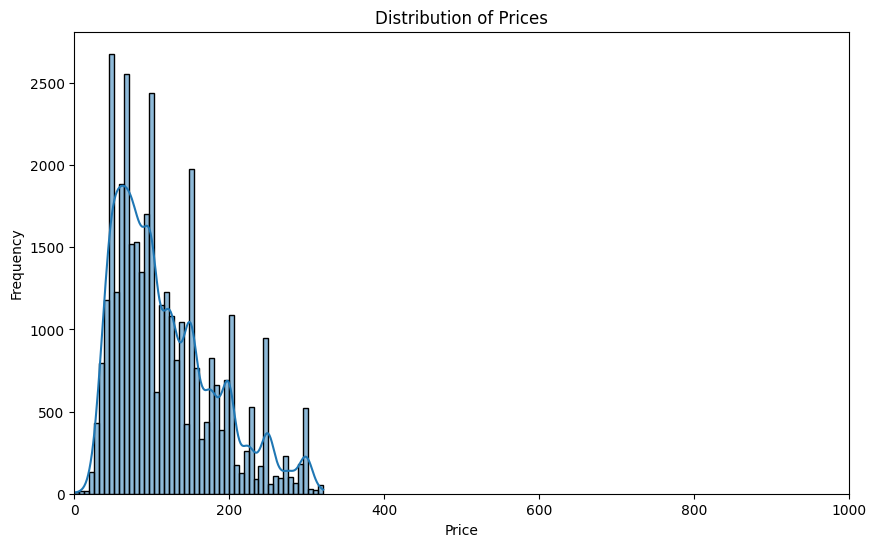

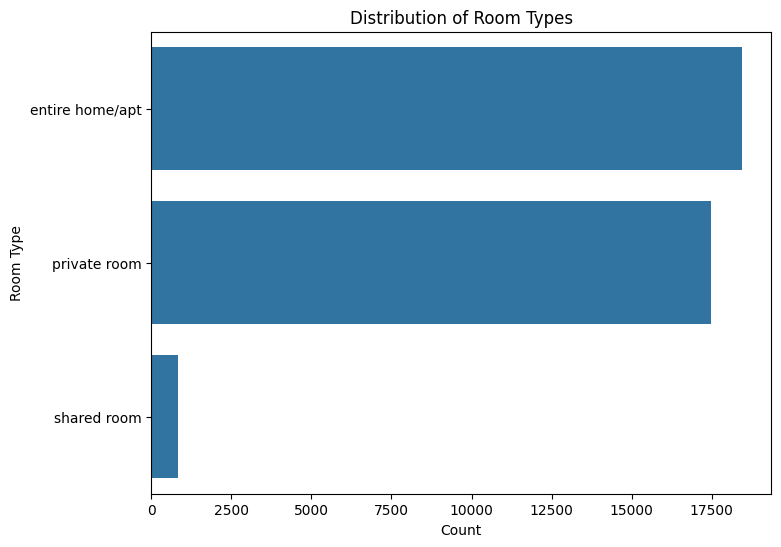

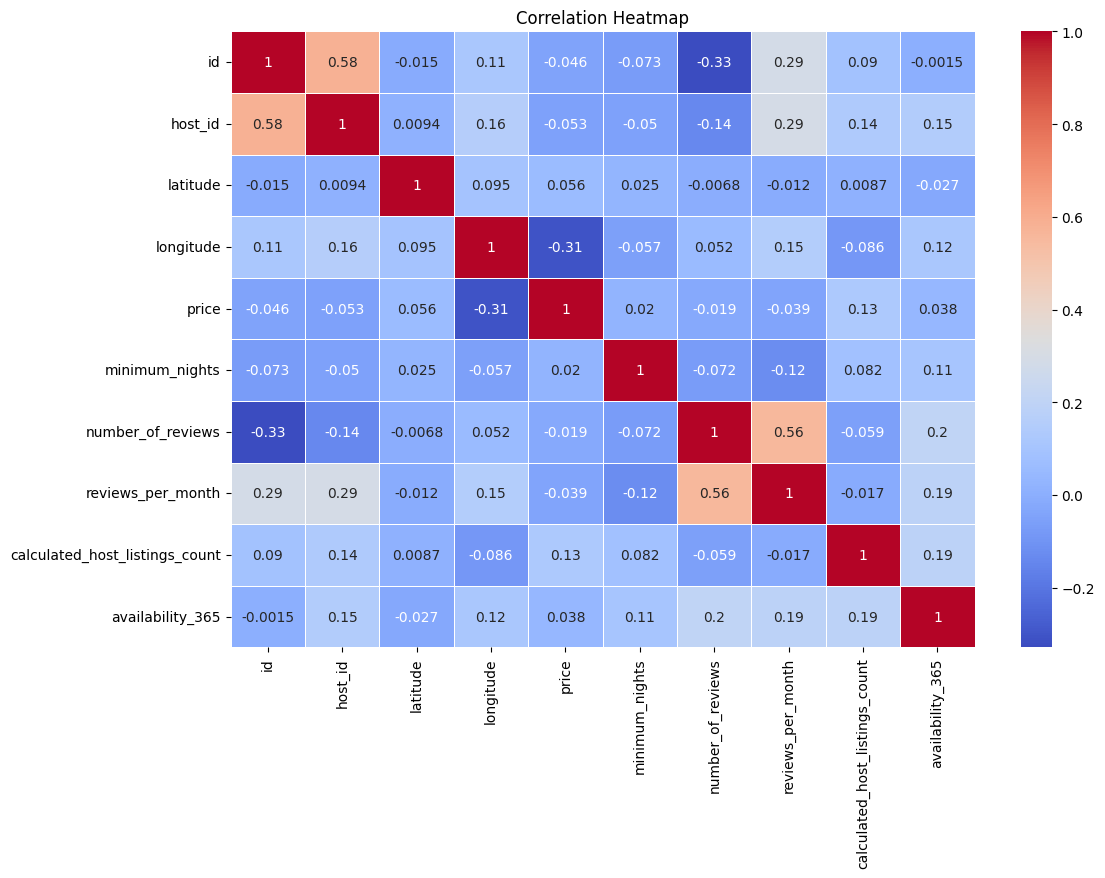

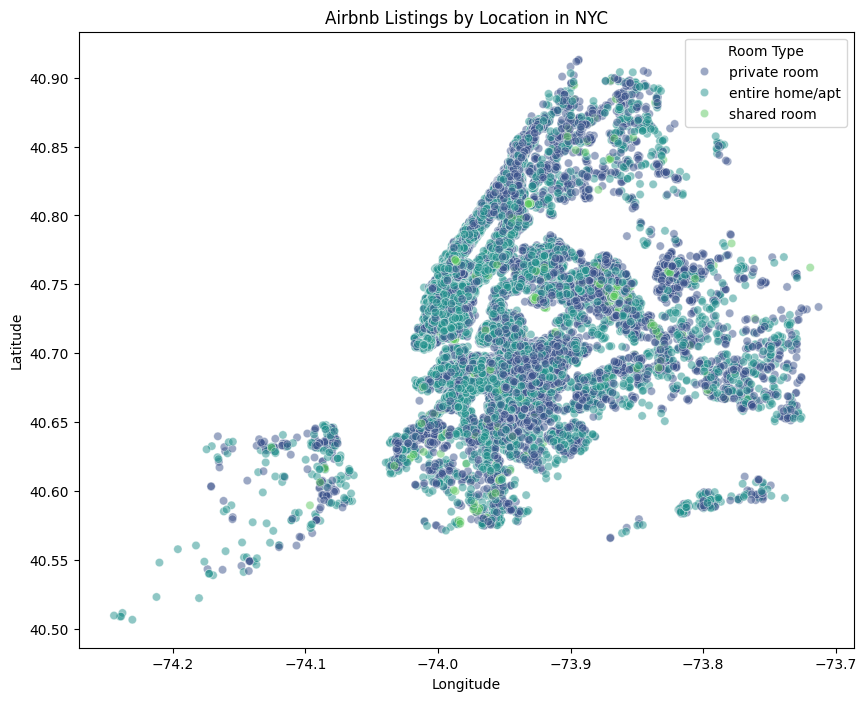

<ipython-input-39-3244b2872c61>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighborhood.index, y=avg_price_neighborhood.values, palette='viridis')


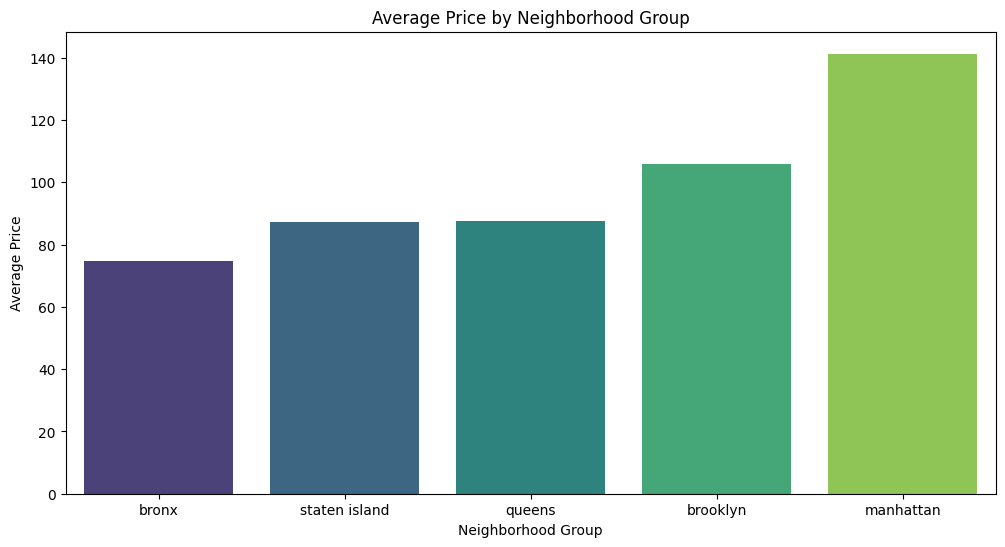

<ipython-input-39-3244b2872c61>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listings_neighborhood.index, y=listings_neighborhood.values, palette='viridis')


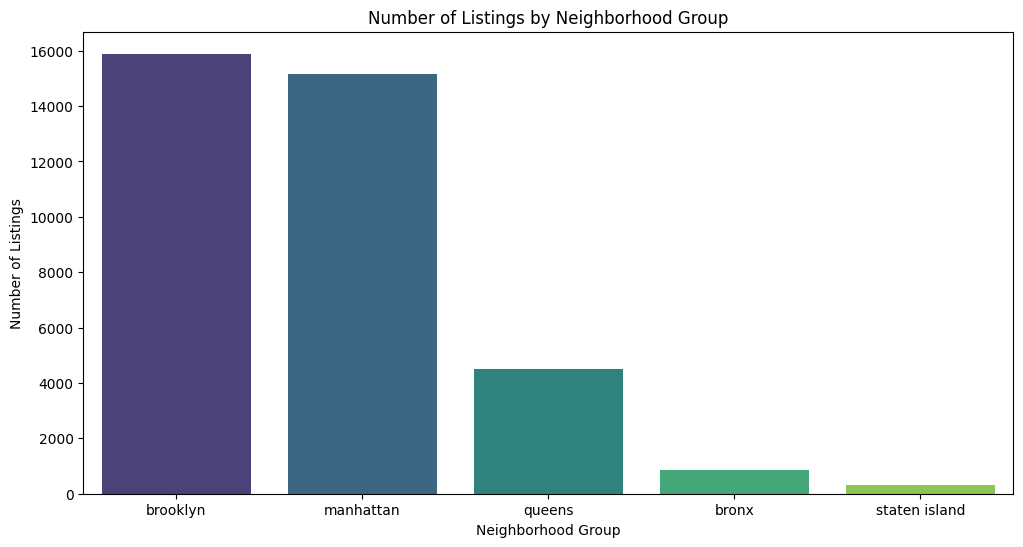

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the cleaned dataset
df_cleaned = pd.read_csv('AB_NYC_2019_cleaned.csv')

# 1. Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting price to 1000 for better visualization
plt.show()

# 2. Distribution of Room Types
plt.figure(figsize=(8, 6))
sns.countplot(y='room_type', data=df_cleaned, order=df_cleaned['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Geographical Visualization: Listings by Location
# Assuming the dataset has 'latitude' and 'longitude' columns for geographical plotting

# NYC boundary shapefile (you can provide the path to the NYC boundary shapefile if available)
# nyc_map = gpd.read_file('path_to_shapefile.shp')

# If shapefile not available, plot with latitude and longitude directly
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df_cleaned, palette='viridis', alpha=0.5)
plt.title('Airbnb Listings by Location in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.show()

# 5. Average Price by Neighborhood Group
plt.figure(figsize=(12, 6))
avg_price_neighborhood = df_cleaned.groupby('neighbourhood_group')['price'].mean().sort_values()
sns.barplot(x=avg_price_neighborhood.index, y=avg_price_neighborhood.values, palette='viridis')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()

# 6. Listings Count by Neighborhood Group
plt.figure(figsize=(12, 6))
listings_neighborhood = df_cleaned['neighbourhood_group'].value_counts()
sns.barplot(x=listings_neighborhood.index, y=listings_neighborhood.values, palette='viridis')
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()
